---

# 🧠 K-Means Clustering (Unsupervised Learning)

## Unsupervised Learning

* In unsupervised learning, the model **does not receive labels** during training.
* The model **finds patterns or groups** within the data on its own.
* Example: Given a large set of exercises, the goal is to **group similar exercises** to identify patterns or main types.

---

## Clustering

* Clustering is a process of **grouping similar data points together**.
* The model identifies **clusters** based on the data’s characteristics.

---

## K-Means Clustering

* K-Means is an **unsupervised learning algorithm** for clustering data.
* The number of clusters (**K**) must be defined before running the algorithm.
* Each cluster has a **centroid**, which is the **mean of all points in the cluster**.

**Basic Steps:**

1. **Initialization:** Randomly assign initial centroids for all clusters.
2. **Assignment:** Each data point is assigned to the nearest centroid.
3. **Update:** New centroids are calculated as the mean of points in each cluster.
4. **Repeat:** Assignment and update steps continue until centroids stabilize.

---

## Applications

* Grouping web search results
* Customer segmentation
* News article aggregation
* Market analysis

---

### Contents

* [1 - Imports](#1)
* [2 - Loading the data](#2)
* [3 - Exploratory Analysis](#3)
* [4 - Preprocessing the data](#4)
* [5 - Trainin K-Means Clustering to Find Clusters](#5)
* [6 - Evaluating K-Means Clustering](#6)

<a name='1'></a>
## 1 - Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a name='2'></a>

## 2 - Loading the data

---

# 🍄 Mushroom Dataset

* This dataset describes mushrooms by their **physical characteristics**.
* Mushrooms are classified as **edible** or **poisonous**.
* The data includes **23 species** from the Agaricus and Lepiota families.
* Some mushrooms with **unknown edibility** are grouped with poisonous ones.
* **No simple rule exists** to determine edibility from appearance alone.
* For clustering, the **labels (edibility)** will be removed, so the algorithm works without them.

---


In [2]:
from sklearn.datasets import fetch_openml

mushroom_data = fetch_openml(name='mushroom', version=1)

In [3]:
mushroom_data.data.shape

(8124, 22)

In [4]:
# displaying feature names
mushroom_data.feature_names

['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises%3F',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [5]:
# displaying target name

mushroom_data.target_names

['class']

In [6]:
# getting the whole dataframe
mushroom_data = mushroom_data.frame

<a name='3'></a>
## 3 - Exploratory Data Analysis


In [7]:
mushroom_data.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


In [8]:
mushroom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   cap-shape                 8124 non-null   category
 1   cap-surface               8124 non-null   category
 2   cap-color                 8124 non-null   category
 3   bruises%3F                8124 non-null   category
 4   odor                      8124 non-null   category
 5   gill-attachment           8124 non-null   category
 6   gill-spacing              8124 non-null   category
 7   gill-size                 8124 non-null   category
 8   gill-color                8124 non-null   category
 9   stalk-shape               8124 non-null   category
 10  stalk-root                5644 non-null   category
 11  stalk-surface-above-ring  8124 non-null   category
 12  stalk-surface-below-ring  8124 non-null   category
 13  stalk-color-above-ring    8124 non-null   catego

All features are categorical. So I will make sure to handle them.

In [9]:
# checking summary statistics
mushroom_data.describe()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,2
top,x,y,n,f,n,f,c,b,b,t,...,w,w,p,w,o,p,w,v,d,e
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4464,4384,8124,7924,7488,3968,2388,4040,3148,4208


In [10]:
# checking missing values
mushroom_data.isnull().sum()

,0
cap-shape,0
cap-surface,0
cap-color,0
bruises%3F,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0
stalk-shape,0


Usually there are three things to do with if them if they are present:
* I can remove all missing values completely
* I can leave them as they are or
* I can fill them with a given strategy such as mean, media or most frequent value. Either `Sklearn` or Pandas provides a quick ways to fill these kind of values.

I will handle that during the data preprocessing.

### More data exploration

<Axes: xlabel='cap-shape', ylabel='count'>

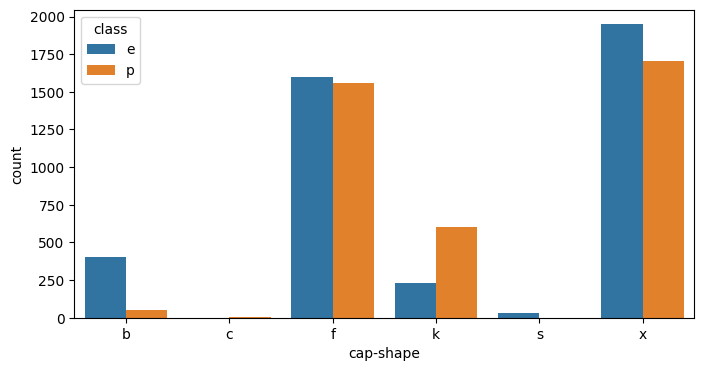

In [11]:
plt.figure(figsize=(8,4))
sns.countplot(data=mushroom_data, x='cap-shape', hue='class')

In cap_shape, the letters stands for: `ell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s`. It seems that the convex type is dominant and most of it are edible.

<Axes: xlabel='cap-color', ylabel='count'>

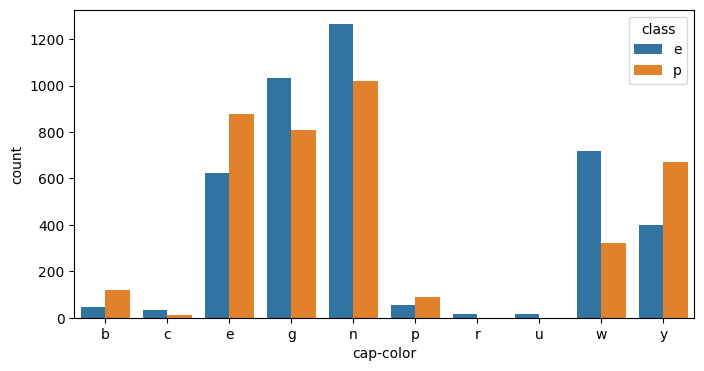

In [12]:
plt.figure(figsize=(8,4))
sns.countplot(data=mushroom_data, x='cap-color', hue='class')

The above is the cap color. The alphabets stands for `brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y `.

Also it seems that most caps are brown(n), either edible or brown.

<Axes: xlabel='population', ylabel='count'>

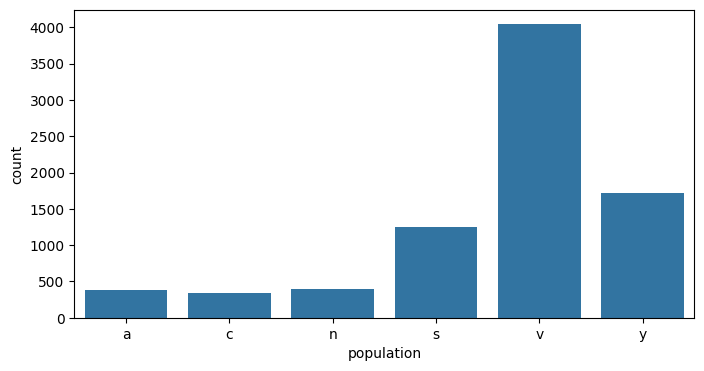

In [13]:
plt.figure(figsize=(8,4))
sns.countplot(data=mushroom_data, x='population')

The most populations are most several. Here are what the letters stand for: `abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y`.  

<Axes: xlabel='habitat', ylabel='count'>

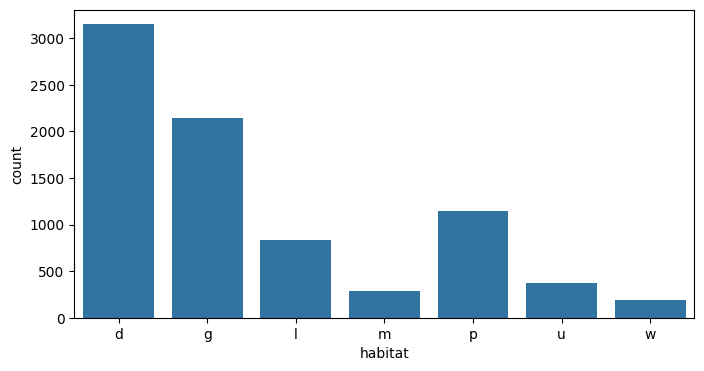

In [14]:
plt.figure(figsize=(8,4))

sns.countplot(data=mushroom_data, x='habitat')

<Axes: xlabel='stalk-root', ylabel='count'>

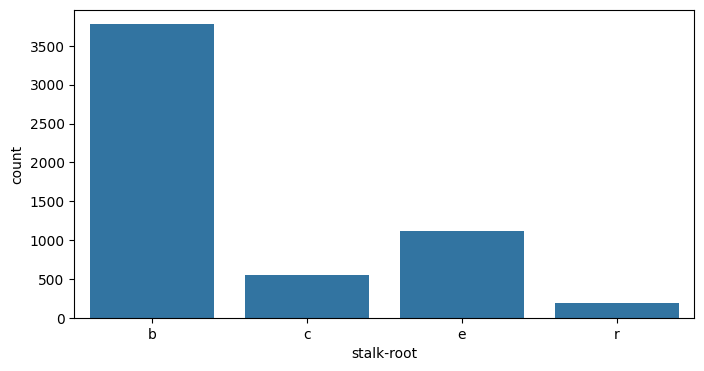

In [15]:
plt.figure(figsize=(8,4))

sns.countplot(data=mushroom_data, x='stalk-root')

Above is the feature that is missing values. I will remove all missing values. Since the missing values are of one category, I will drop it to avoid adding noise in the dataset.

And finally, I can look in the class feature. There are two categories, `e(edible)` and `p(poisonous)`.

<Axes: xlabel='class', ylabel='count'>

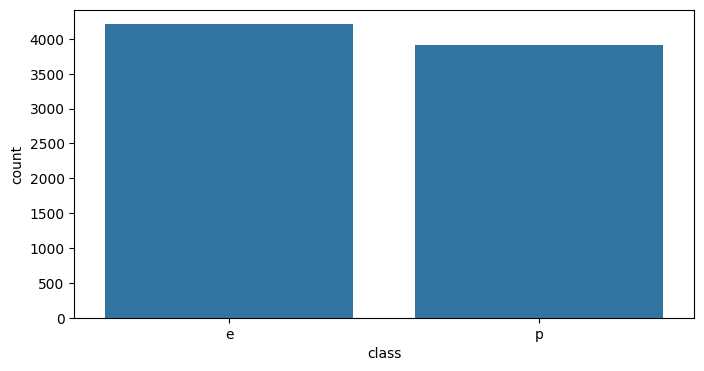

In [16]:
plt.figure(figsize=(8,4))

sns.countplot(data=mushroom_data, x='class')

<a name='4'></a>

## 4 - Data Preprocessing

I'm gonna remove the missing values first.

In [17]:
mushroom_df = mushroom_data.dropna()

For the purpose of performing clustering, I will remove the labels.

In [18]:
mushroom = mushroom_df.drop('class', axis=1)
mushroom_labels = mushroom_df['class']

I'm gonna convert all categorical features into the numerics.

In [19]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
mushroom_prepared = encoder.fit_transform(mushroom)

In [20]:
mushroom_prepared

array([[5., 2., 4., ..., 1., 3., 5.],
       [5., 2., 7., ..., 2., 2., 1.],
       [0., 2., 6., ..., 2., 2., 3.],
       ...,
       [5., 3., 3., ..., 5., 5., 4.],
       [5., 3., 1., ..., 5., 1., 0.],
       [2., 3., 1., ..., 5., 1., 0.]])

`mushroom_prepared` is a NumPy array. I can convert it back to the Pandas Dataframe although KMeans algorithm can accept both as input.

In [21]:
mushroom_prep_df = pd.DataFrame(mushroom_prepared, columns=mushroom.columns)
mushroom_prep_df.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5.0,2.0,4.0,1.0,6.0,1.0,0.0,1.0,2.0,0.0,...,2.0,5.0,5.0,0.0,0.0,1.0,3.0,1.0,3.0,5.0
1,5.0,2.0,7.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,...,2.0,5.0,5.0,0.0,0.0,1.0,3.0,2.0,2.0,1.0
2,0.0,2.0,6.0,1.0,3.0,1.0,0.0,0.0,3.0,0.0,...,2.0,5.0,5.0,0.0,0.0,1.0,3.0,2.0,2.0,3.0
3,5.0,3.0,6.0,1.0,6.0,1.0,0.0,1.0,3.0,0.0,...,2.0,5.0,5.0,0.0,0.0,1.0,3.0,1.0,3.0,5.0
4,5.0,2.0,3.0,0.0,5.0,1.0,1.0,0.0,2.0,1.0,...,2.0,5.0,5.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0


<a name='5'></a>

## 5 - Training K-Means Clustering to Find Clusters

I'm going to create a KMeans model from `sklearn.cluster`. I'll provide the number of the clusters, which is 2 in my case.

In [22]:
from sklearn.cluster import KMeans

k_clust = KMeans(n_clusters=2, random_state=42)
k_clust.fit(mushroom_prep_df)

KMeans(n_clusters=2, random_state=42)

I can access the cluster centers by `model.cluster_centers_`.

In [23]:
k_clust.cluster_centers_

array([[ 3.44593056e+00,  1.57797382e+00,  3.67558338e+00,
         7.25099602e-01,  4.56431417e+00,  9.94877632e-01,
         2.48150256e-01,  1.53101878e-01,  4.62692089e+00,
         7.52988048e-01,  7.34490609e-01,  1.74473534e+00,
         1.79681275e+00,  4.29624360e+00,  4.26892430e+00,
         0.00000000e+00,  2.27660785e-03,  1.01935117e+00,
         2.34120660e+00,  1.63972681e+00,  3.58252703e+00,
         9.05805350e-01],
       [ 3.37793427e+00,  1.70845070e+00,  5.25821596e+00,
         2.98591549e-01,  1.91596244e+00,  1.00000000e+00,
         7.13615023e-02,  7.79342723e-02,  1.73849765e+00,
         1.09859155e-01,  3.71361502e-01,  1.28873239e+00,
         1.32676056e+00,  3.37793427e+00,  3.37793427e+00,
         0.00000000e+00, -4.03323208e-17,  1.00751174e+00,
         1.69248826e+00,  5.15492958e-01,  3.92816901e+00,
         1.78075117e+00]])

Also, I can get the labels that the KMeans provided for each data point.

In [24]:
k_labels = k_clust.labels_
k_labels

array([0, 1, 1, ..., 0, 0, 0], dtype=int32)

<a name='6'></a>

### 6 -Evaluating K-Means Clustering

---

* In the real world, **K-Means evaluation is difficult** because there are usually **no true labels** to compare with clusters.
* In this case, the mushroom dataset **has labels**, so it is possible to:

  * Calculate **accuracy**
  * Create a **confusion matrix**
  * Generate a **classification report** with **Precision, Recall, F1 Score**
* For basic comparison, **only accuracy** is enough.
* True labels need to be **converted to numbers** (encoded) before comparison.

---


In [25]:
map_dict = {
    'p':0,
    'e':1
}

mushroom_labels_prep = mushroom_labels.map(map_dict)

In [26]:
mushroom_labels_prep

,class
0,0
1,1
2,1
3,0
4,1
...,...
7986,1
8001,1
8038,1
8095,0


In [27]:
from sklearn.metrics import accuracy_score

accuracy_score(mushroom_labels_prep, k_labels)

0.2074769666902906

---

# 🌟 Observations and Applications of K-Means

* K-Means **never sees the labels**. It only uses the features to **find patterns**.
* In the mushroom dataset, it can **separate poisonous and edible mushrooms** based on characteristics.
* **K-Means is useful for unlabeled data**, such as:

  * **Customer segmentation**: Grouping customers with similar interests for targeted promotions.
  * **Industrial applications**: Grouping equipment with similar defects.
* These are just a few examples; K-Means has **many applications** in real-world data.

---